# Exploratory Data Analysis (EDA) of the Midwest Climate Data

## Variables
* tp: Total precipitation
* sst: Sea surface temperature
* thickness: Tropospheric thickness between 850 and 500 hPa
* pottemp: 45m ocean potential temperature
* pr_wtr: Precipitable water
* lftx4: Atmospheric lifted index
* chi: upper troposphere velocity potential
* tcdc: total cloud cover
* shum: 2m specific humidity

## Variable Validation
1. Total Precipitation (tp)
Description: Total precipitation measures the amount of liquid water (rain, snow, sleet, etc.) that falls over a specific period.
Relation to Precipitation: This is the target variable for the model. Analyzing historical patterns of total precipitation helps to understand seasonal variations and identify trends influenced by other predictors.

2. Tropospheric Thickness (thickness)
Description: Tropospheric thickness is the difference in pressure between two levels in the atmosphere, typically between 850 and 500 hPa. It can be indicative of the overall stability and temperature of the atmosphere.
Relation to Precipitation: A thicker troposphere often corresponds to warmer air and higher moisture content, which can lead to increased precipitation. It can also reflect the presence of weather systems that contribute to precipitation.

3. Precipitable Water (pr_wtr)
Description: Precipitable water measures the total amount of moisture in the vertical column of the atmosphere, expressed in millimeters.
Relation to Precipitation: Higher values of precipitable water indicate more moisture available for precipitation. This variable is critical for understanding heavy rainfall events and the potential for severe weather.

4. Atmospheric Lifted Index (lftx4)
Description: The atmospheric lifted index is a measure of atmospheric stability, calculated as the difference between the temperature of a parcel of air lifted to a certain altitude and the surrounding air temperature.
Relation to Precipitation: Negative values suggest instability and the potential for convection, which can lead to precipitation. It helps identify conditions favorable for thunderstorms, which are common in the Midwest during warmer months.

5. Upper Troposphere Velocity Potential (chi)
Description: This variable reflects the divergence of the upper-level winds, influencing the development of weather systems.
Relation to Precipitation: Variations in velocity potential can indicate areas of upward motion, which are often associated with storm development and precipitation. In the Midwest, this can help identify synoptic-scale weather patterns that lead to precipitation events.

6. Total Cloud Cover (tcdc)
Description: Total cloud cover measures the fraction of the sky covered by clouds, which can influence temperature and radiation balance.
Relation to Precipitation: Increased cloud cover generally indicates a higher likelihood of precipitation, as clouds are necessary for rain or snow formation. Understanding cloud cover can help predict short-term precipitation events.

7. 2m Specific Humidity (shum)
Description: Specific humidity measures the mass of water vapor per unit mass of air, at a height of 2 meters above the surface.
Relation to Precipitation: Higher specific humidity indicates more moisture in the lower atmosphere, which can contribute to precipitation. It is particularly relevant in understanding humidity levels preceding rain events.

8. Ocean Niño Index (oni)
Description: The Ocean Niño Index (ONI) quantifies sea surface temperature anomalies in the equatorial Pacific Ocean, serving as a key indicator of El Niño and La Niña phenomena. Specifically, it is calculated as a three-month running average of the sea surface temperature departures from the long-term average in the Niño 3.4 region (5°N to 5°S, 170°W to 120°W).
Relation to Precipitation: The ONI is crucial for understanding large-scale climatic patterns that influence weather systems worldwide, including the Midwestern United States. El Niño events, characterized by warmer sea surface temperatures, often lead to wetter conditions in the Midwest during the winter months, while La Niña events, marked by cooler temperatures, can result in drier and more variable precipitation patterns. By monitoring the ONI, forecasters can anticipate shifts in precipitation trends and improve seasonal forecasting accuracy for the region.

9. Sea Surface Temperature (sst) - removed
Description: Sea surface temperature refers to the temperature of the ocean's surface layer, influencing weather and climate.
Relation to Precipitation: SST impacts atmospheric circulation patterns and can influence storm formation. In the Midwest, changes in SST, especially in the nearby Great Lakes or the Gulf of Mexico, can affect moisture availability and precipitation patterns.

10. 45m Ocean Potential Temperature (pottemp) - removed
Description: This variable measures the temperature of seawater at a depth of 45 meters, adjusted for pressure.
Relation to Precipitation: Changes in ocean potential temperature can indicate variations in oceanic currents and heat distribution, influencing atmospheric conditions and precipitation in the Midwest.

## Additional Important Variables:
Drought Indecies (Palmer Drought Severity Index, Standardized Precipitation Index, etc.)
Soil Moisture Content
Evapotranspiration Rates
Temperature Anomalies
Elevation Data
Wind Speed and Direction
Solar Radiation

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pathlib
import os

In [2]:
# get the data directory
data_dir = pathlib.Path(os.getcwd()).parent / "data"
oni_file = data_dir / "processed_data" / "ocean_nino_index.csv"
combined_file = data_dir / "processed_data" / "combined_data.nc"

In [3]:
# Load the data
oni = pd.read_csv(oni_file, index_col=0, parse_dates=True)
combined = xr.open_dataset(combined_file)

# Descriptive Statistics

In [4]:
# get descriptive statistics for the data
combined_stats = combined.to_dataframe().dropna()  # Drop NaN values

# Get descriptive statistics using Pandas
summary = combined_stats.describe()
print(summary)

                 tp    level     thickness        pr_wtr         lftx4  \
count  32760.000000  32760.0  32760.000000  32760.000000  32760.000000   
mean      69.625275     45.0   4175.973633     15.228955      5.829055   
std       47.030613      0.0    114.682426      8.520293      4.808445   
min        0.034884     45.0   3829.544678      2.226786     -4.869995   
25%       32.946344     45.0   4087.251770      8.083024      1.890015   
50%       60.924429     45.0   4172.216309     12.849015      5.109985   
75%       96.532602     45.0   4272.292847     21.583779      9.829987   
max      434.179443     45.0   4436.193359     44.573387     19.160004   

                chi          tcdc          shum  
count  3.276000e+04  32760.000000  32760.000000  
mean   6.065429e+05     39.421505      6.780341  
std    2.784232e+06      7.729695      3.903246  
min   -7.581249e+06     11.347488      0.770093  
25%   -1.613983e+06     34.182887      3.490570  
50%    3.466184e+05     39.519999

# Histograms

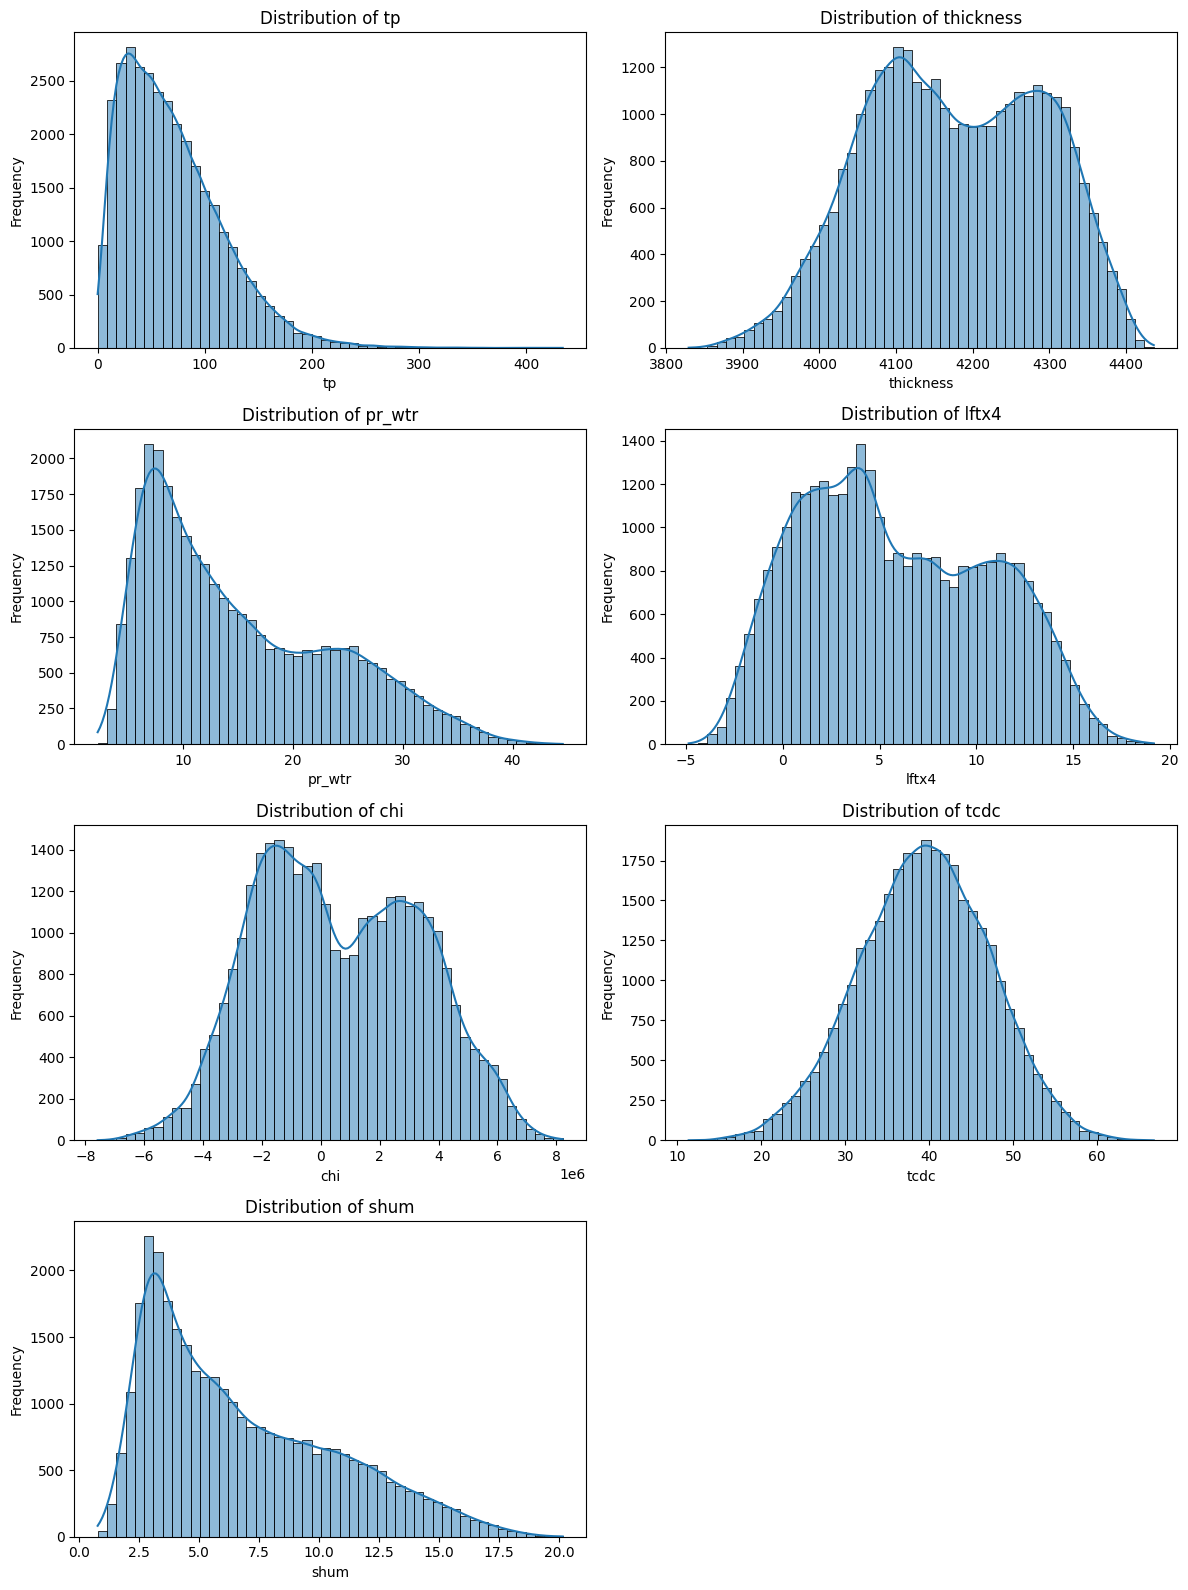

In [5]:
# Determine the number of variables
num_vars = len(combined.data_vars)

# Create a figure with subplots
fig, axes = plt.subplots(
    nrows=(num_vars + 1) // 2, ncols=2, figsize=(12, 4 * ((num_vars + 1) // 2))
)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms of all variables
for i, var in enumerate(combined.data_vars):
    sns.histplot(combined[var].values.flatten(), kde=True, bins=50, ax=axes[i])
    axes[i].set_title(f"Distribution of {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Frequency")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

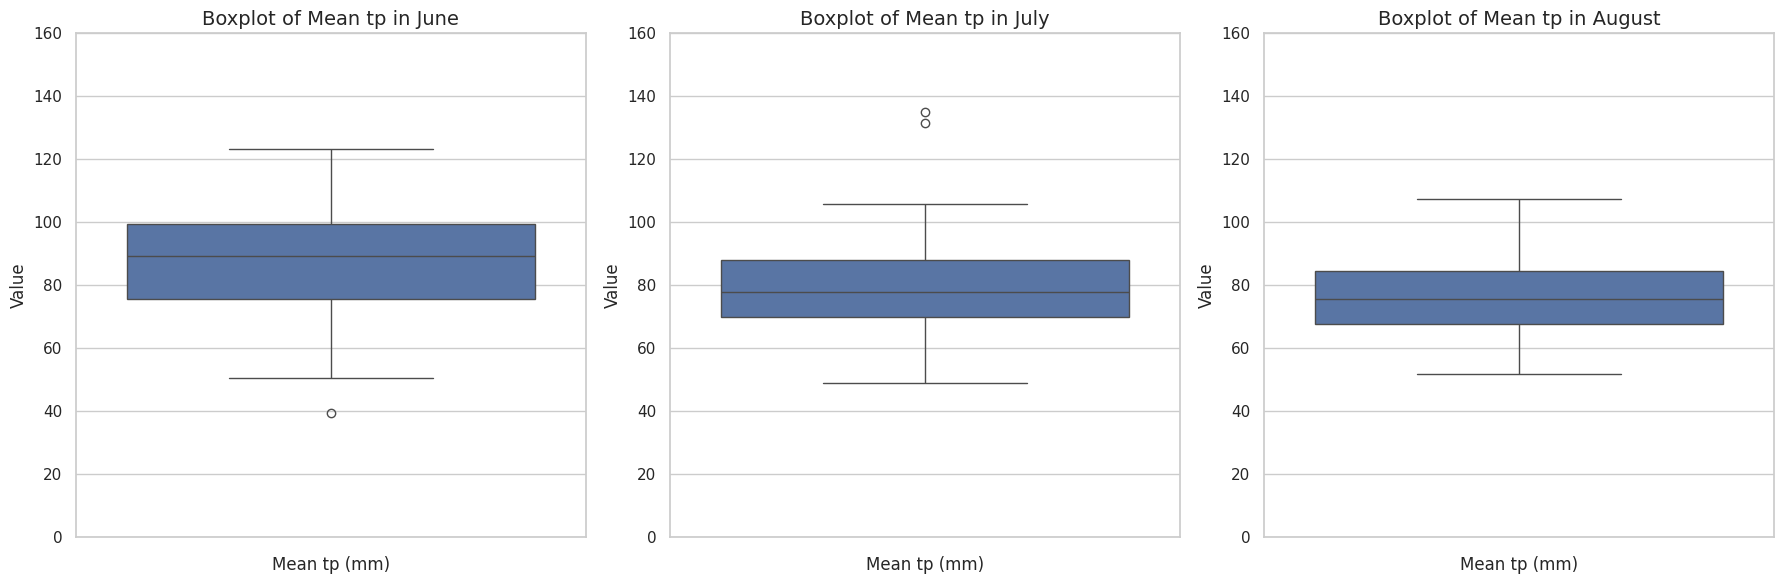

In [30]:
# Create a figure with three subplots
fig, axes = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(18, 6),
)

# List of months for the plots
months = ["June", "July", "August"]

# Filter the 'tp' data for each month
tp_june = combined["tp"].sel(time=combined["time.month"] == 6)
tp_july = combined["tp"].sel(time=combined["time.month"] == 7)
tp_august = combined["tp"].sel(time=combined["time.month"] == 8)

# List to store the data for each month
tp_data = [tp_june, tp_july, tp_august]

# Plot the boxplots for each month
for i, (data, month) in enumerate(zip(tp_data, months)):
    # Calculate the mean over the spatial dimensions for each time step
    mean_data = data.mean(dim=["latitude", "longitude"]).values
    min_data = data.min(dim=["latitude", "longitude"]).values
    max_data = data.max(dim=["latitude", "longitude"]).values

    # Create a boxplot
    sns.boxplot(mean_data, ax=axes[i])
    axes[i].set_title(f"Boxplot of Mean tp in {month}", fontsize=14)
    axes[i].set_xlabel("Mean tp (mm)")
    axes[i].set_ylabel("Value")
    axes[i].set_ylim(0, 160)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

/tmp/ipykernel_3657/4286874502.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(months)
/tmp/ipykernel_3657/4286874502.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(months)
/tmp/ipykernel_3657/4286874502.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(months)


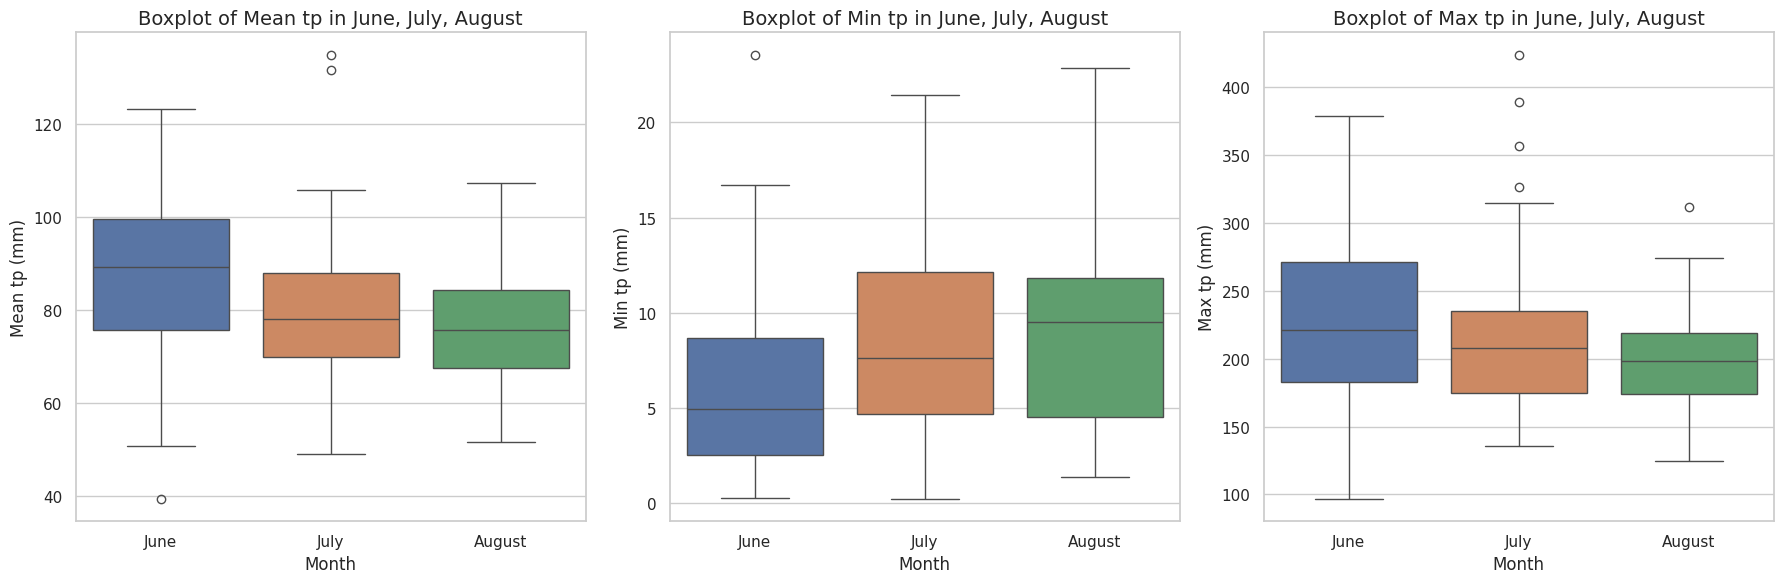

In [35]:
# Create a figure with three subplots for each statistic (mean, min, max)
fig, axes = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(18, 6),
)

# List of months for the plots
months = ["June", "July", "August"]

# Filter the 'tp' data for each month
tp_june = combined["tp"].sel(time=combined["time.month"] == 6)
tp_july = combined["tp"].sel(time=combined["time.month"] == 7)
tp_august = combined["tp"].sel(time=combined["time.month"] == 8)

# List to store the data for each month
tp_data = [tp_june, tp_july, tp_august]

# Calculate mean, min, and max for each month
stat_data = {
    "Mean": [data.mean(dim=["latitude", "longitude"]).values for data in tp_data],
    "Min": [data.min(dim=["latitude", "longitude"]).values for data in tp_data],
    "Max": [data.max(dim=["latitude", "longitude"]).values for data in tp_data],
}

# Plot the boxplots for each statistic across all months
for i, (stat, data_list) in enumerate(stat_data.items()):
    # Create boxplots for each month
    sns.boxplot(data=data_list, ax=axes[i])
    axes[i].set_title(f"Boxplot of {stat} tp in June, July, August", fontsize=14)
    axes[i].set_xlabel("Month")
    axes[i].set_ylabel(f"{stat} tp (mm)")
    axes[i].set_xticklabels(months)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Correlation Analysis

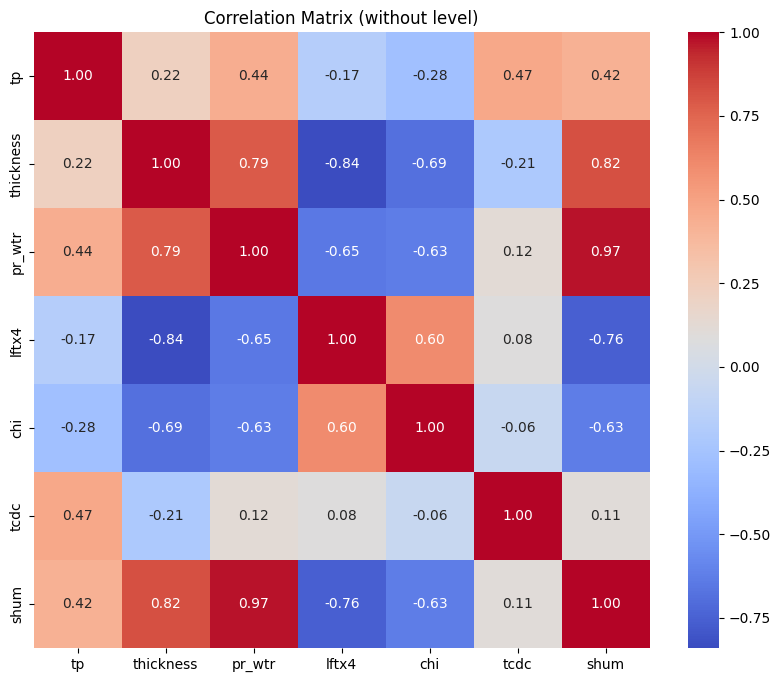

In [6]:
corr = combined_stats.drop(columns=["level"]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix (without level)")
plt.show()

# Time Series Analysis

/tmp/ipykernel_3657/2811305461.py:23: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  time_in_months = summed_var["time"].astype("datetime64[M]").astype("int")
/tmp/ipykernel_3657/2811305461.py:23: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by c

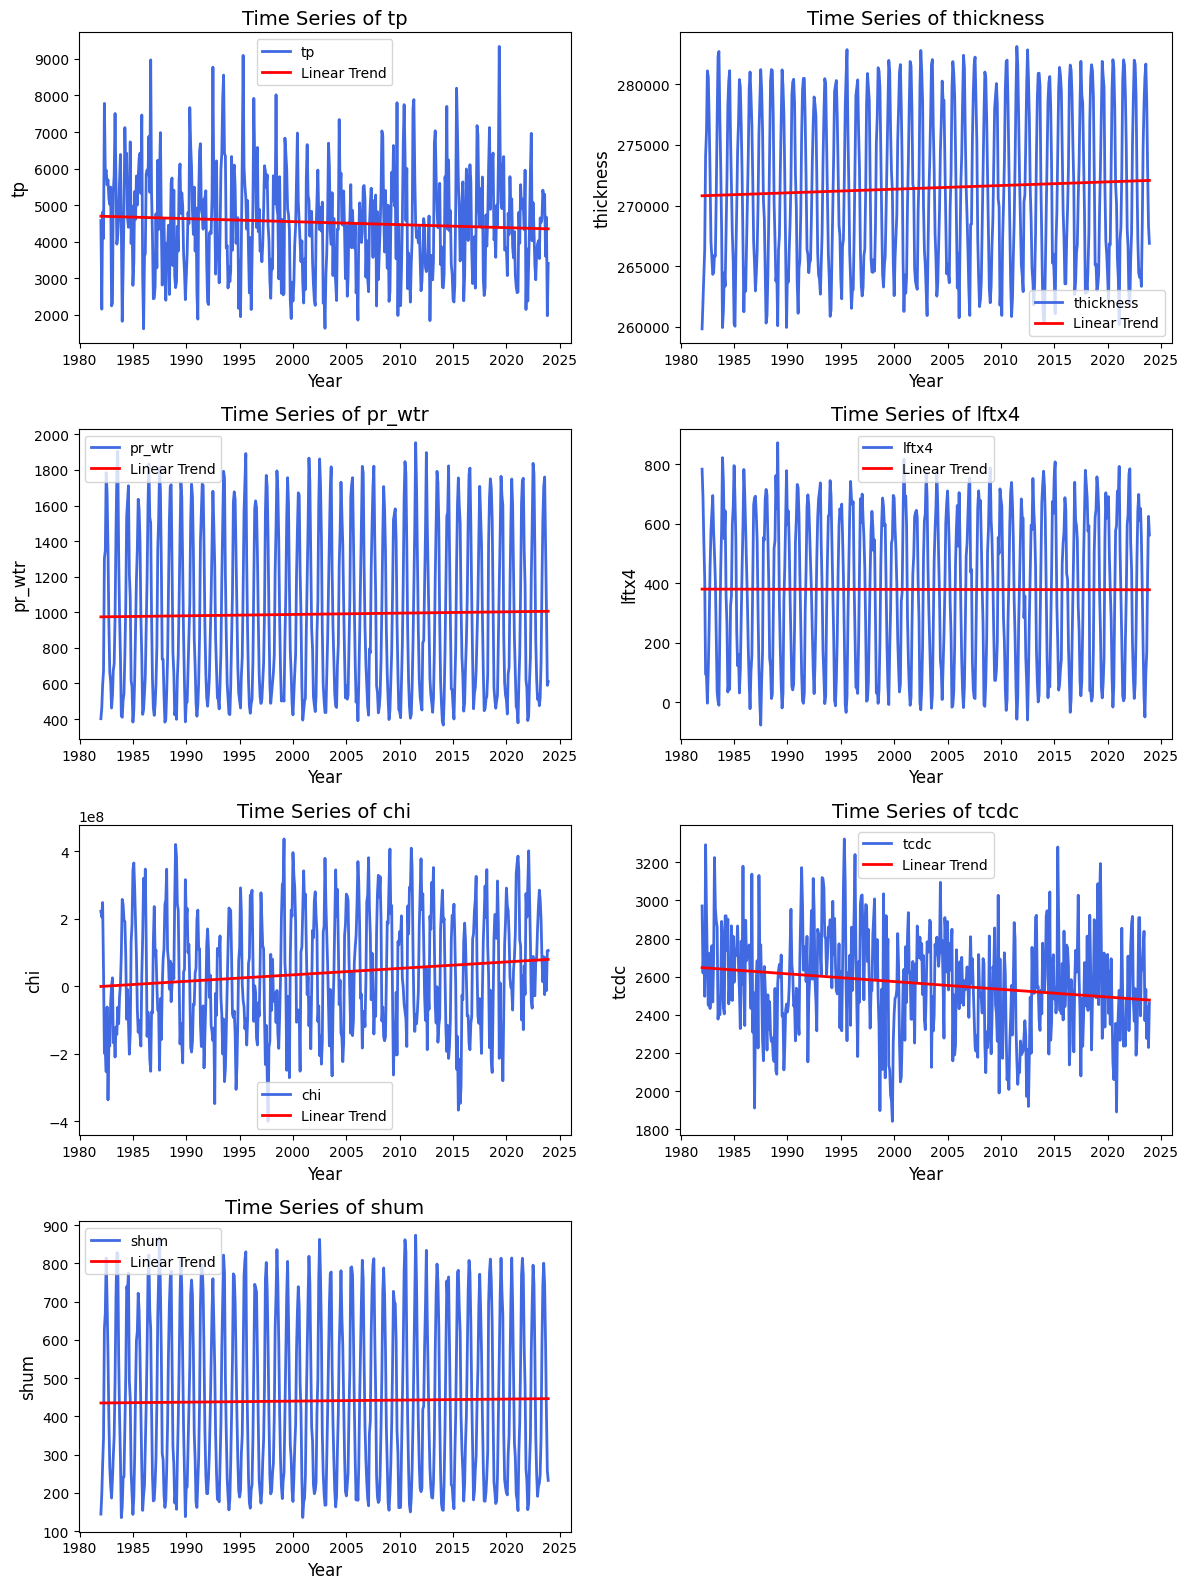

In [7]:
# Determine the number of variables
num_vars = len(combined.data_vars)

# Create a figure with subplots
fig, axes = plt.subplots(
    nrows=(num_vars + 1) // 2, ncols=2, figsize=(12, 4 * ((num_vars + 1) // 2))
)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each variable and plot time series
for i, var in enumerate(combined.data_vars):
    # Check if the variable has a time dimension
    if "time" in combined[var].dims:
        # Sum the variable over the spatial dimensions (if applicable)
        summed_var = combined[var].sum(dim=["latitude", "longitude"])

        # Get the linear trend of the variable
        trend = summed_var.polyfit(dim="time", deg=1)

        # Convert 'time' to numerical months for trend line calculation
        time_in_months = summed_var["time"].astype("datetime64[M]").astype("int")

        # Compute the trend line (y = a * time + b)
        trend_line = (
            trend.polyfit_coefficients[0] * time_in_months
            + trend.polyfit_coefficients[1]
        )

        # Plot the summed variable
        summed_var.plot(ax=axes[i], color="royalblue", linewidth=2, label=f"{var}")

        # Plot the trend line
        axes[i].plot(
            summed_var["time"],
            trend_line,
            color="red",
            linewidth=2,
            label="Linear Trend",
        )

        # Adding labels and title for each subplot
        axes[i].set_title(f"Time Series of {var}", fontsize=14)
        axes[i].set_ylabel(var, fontsize=12)
        axes[i].set_xlabel("Year", fontsize=12)

        # Add a legend
        axes[i].legend()

    else:
        # If the variable doesn't have a time dimension, hide the subplot
        axes[i].set_visible(False)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

/tmp/ipykernel_3657/2245642380.py:20: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  time_in_months = summed_var["time"].astype("datetime64[M]").astype("int")


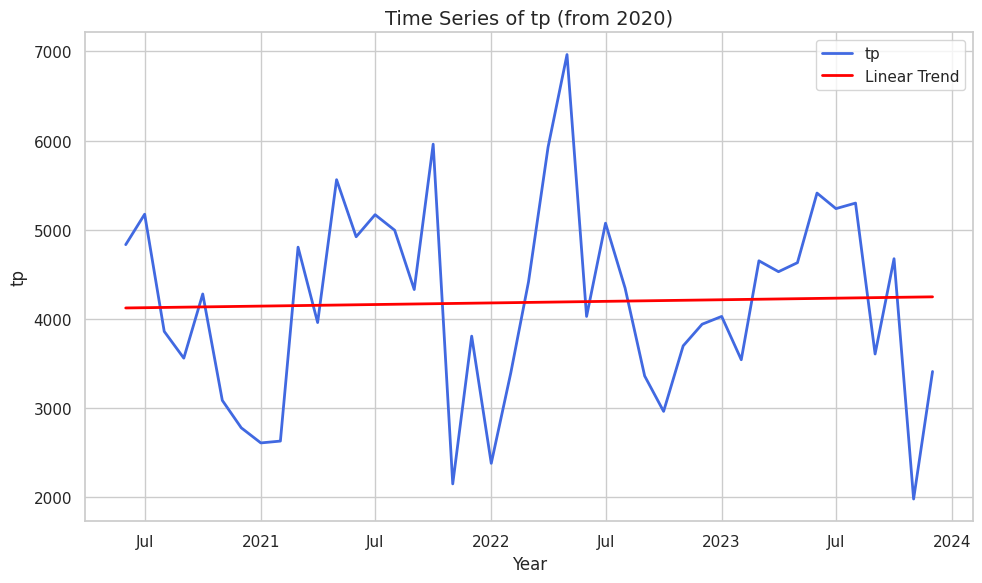

In [37]:
# Filter the data from 2020 onwards
start_date = np.datetime64("2020-06-01")
filtered_combined = combined.sel(time=slice(start_date, None))

# Select the 'tp' variable (total precipitation)
var = "tp"

# Create a figure for the 'tp' time series
fig, ax = plt.subplots(figsize=(10, 6))

# Check if the variable has a time dimension
if "time" in filtered_combined[var].dims:
    # Sum the variable over the spatial dimensions (latitude, longitude)
    summed_var = filtered_combined[var].sum(dim=["latitude", "longitude"])

    # Get the linear trend of the variable
    trend = summed_var.polyfit(dim="time", deg=1)

    # Convert 'time' to numerical months for trend line calculation
    time_in_months = summed_var["time"].astype("datetime64[M]").astype("int")

    # Compute the trend line (y = a * time + b)
    trend_line = (
        trend.polyfit_coefficients[0] * time_in_months + trend.polyfit_coefficients[1]
    )

    # Plot the summed variable
    summed_var.plot(ax=ax, color="royalblue", linewidth=2, label=f"{var}")

    # Plot the trend line
    ax.plot(
        summed_var["time"],
        trend_line,
        color="red",
        linewidth=2,
        label="Linear Trend",
    )

    # Adding labels and title
    ax.set_title(f"Time Series of {var} (from 2020)", fontsize=14)
    ax.set_ylabel(var, fontsize=12)
    ax.set_xlabel("Year", fontsize=12)

    # Add a legend
    ax.legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Seasonality Analysis

In [9]:
# Extract the month from the 'time' coordinate
summer_months = combined.sel(time=combined["time"].dt.month.isin([6, 7, 8]))

/tmp/ipykernel_3657/1433244514.py:20: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  time_in_months = summed_var["time"].astype("datetime64[M]").astype("int")
/tmp/ipykernel_3657/1433244514.py:20: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by c

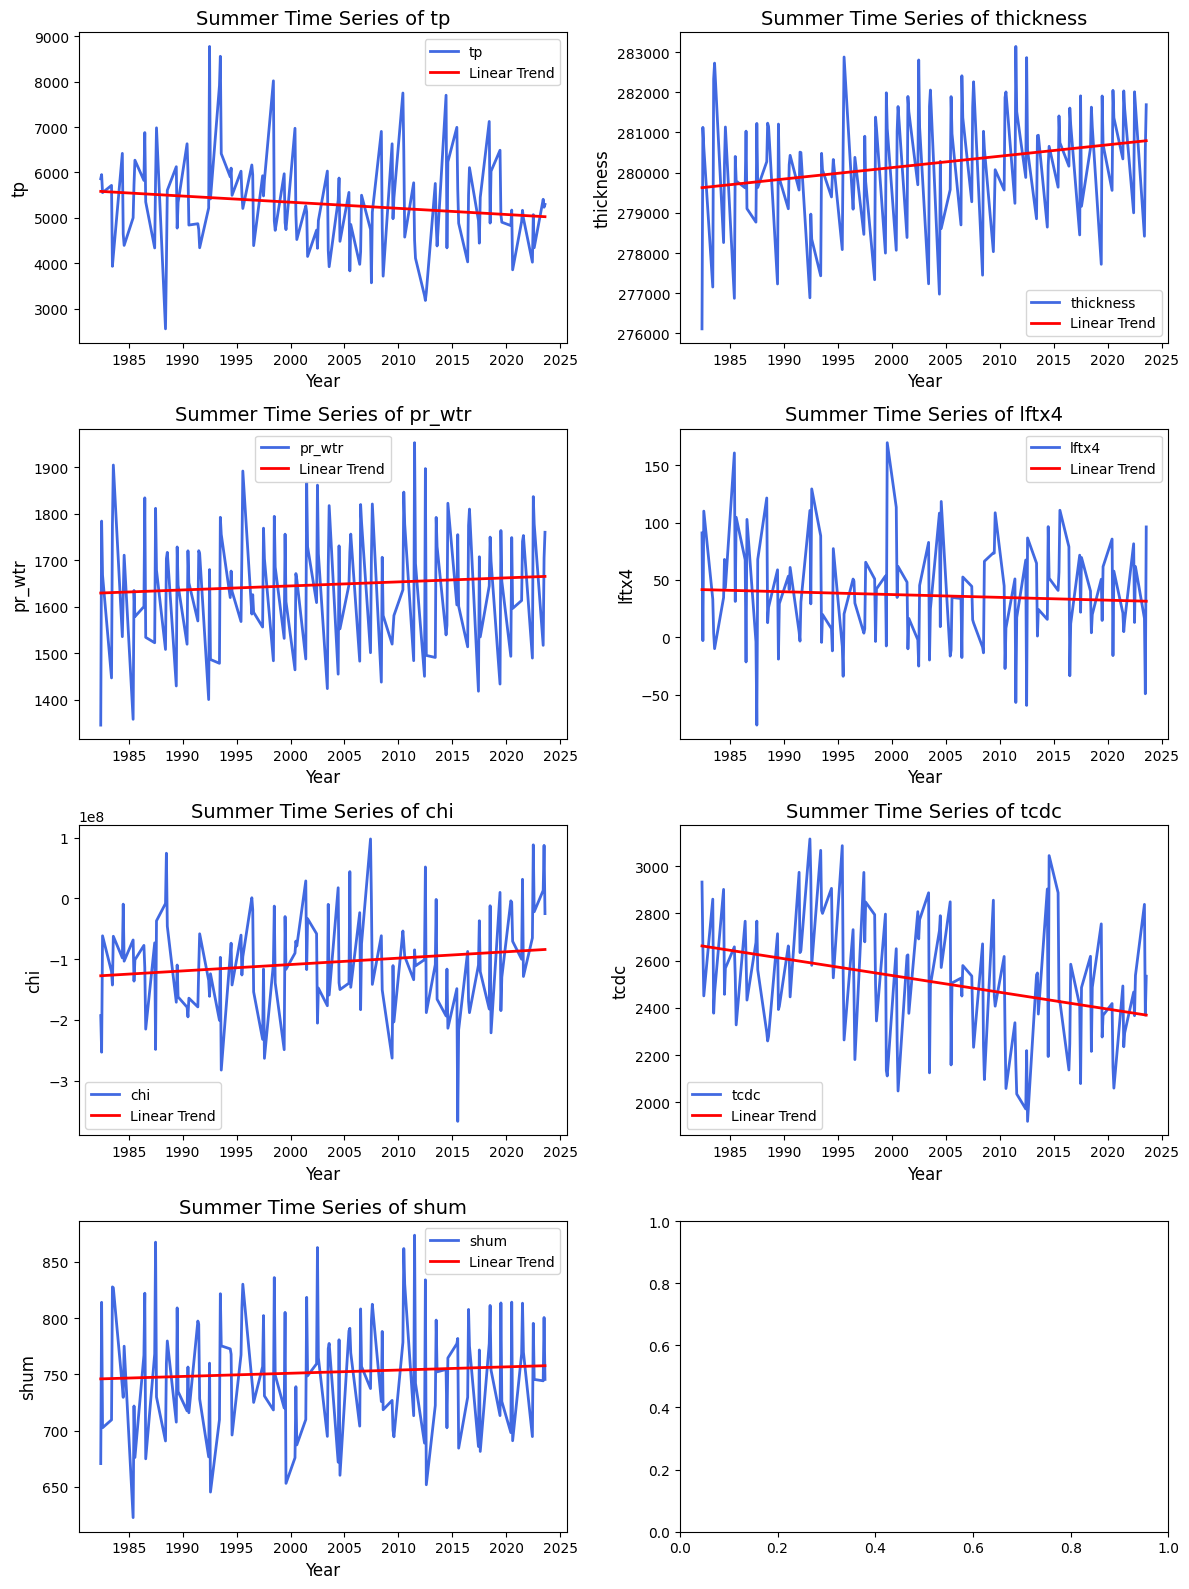

In [10]:
# Determine the number of variables
num_vars = len(summer_months.data_vars)

# Create a figure with subplots
fig, axes = plt.subplots(
    nrows=(num_vars + 1) // 2, ncols=2, figsize=(12, 4 * ((num_vars + 1) // 2))
)

axes = axes.flatten()

# Loop through each variable and plot time series for summer months
for i, var in enumerate(summer_months.data_vars):
    if "time" in summer_months[var].dims:
        # Sum the variable over spatial dimensions if applicable
        summed_var = summer_months[var].sum(dim=["latitude", "longitude"])

        # Get the linear trend for summer months
        trend = summed_var.polyfit(dim="time", deg=1)

        time_in_months = summed_var["time"].astype("datetime64[M]").astype("int")

        trend_line = (
            trend.polyfit_coefficients[0] * time_in_months
            + trend.polyfit_coefficients[1]
        )

        # Plot the summer months' time series
        summed_var.plot(ax=axes[i], color="royalblue", linewidth=2, label=f"{var}")

        # Plot the trend line
        axes[i].plot(
            summed_var["time"],
            trend_line,
            color="red",
            linewidth=2,
            label="Linear Trend",
        )

        axes[i].set_title(f"Summer Time Series of {var}", fontsize=14)
        axes[i].set_ylabel(var, fontsize=12)
        axes[i].set_xlabel("Year", fontsize=12)

        axes[i].legend()

    else:
        axes[i].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

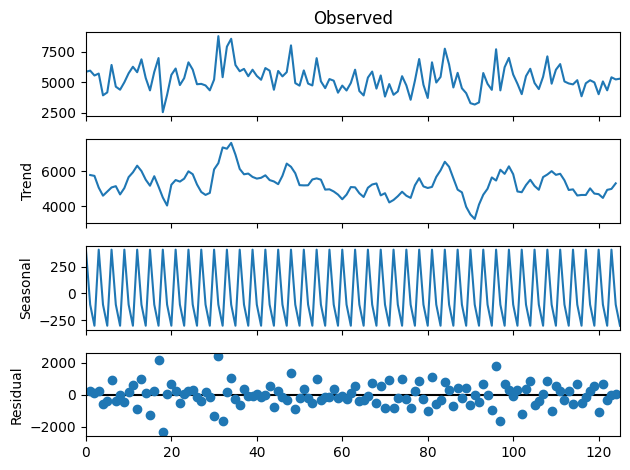

In [11]:
# Example for one variable (you can loop through others similarly)
summed_var = summer_months["tp"].sum(dim=["latitude", "longitude"])

# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(summed_var, model="additive", period=3)

# Plot the decomposed components
decomposition.plot()
plt.show()

# Spatial Analysis

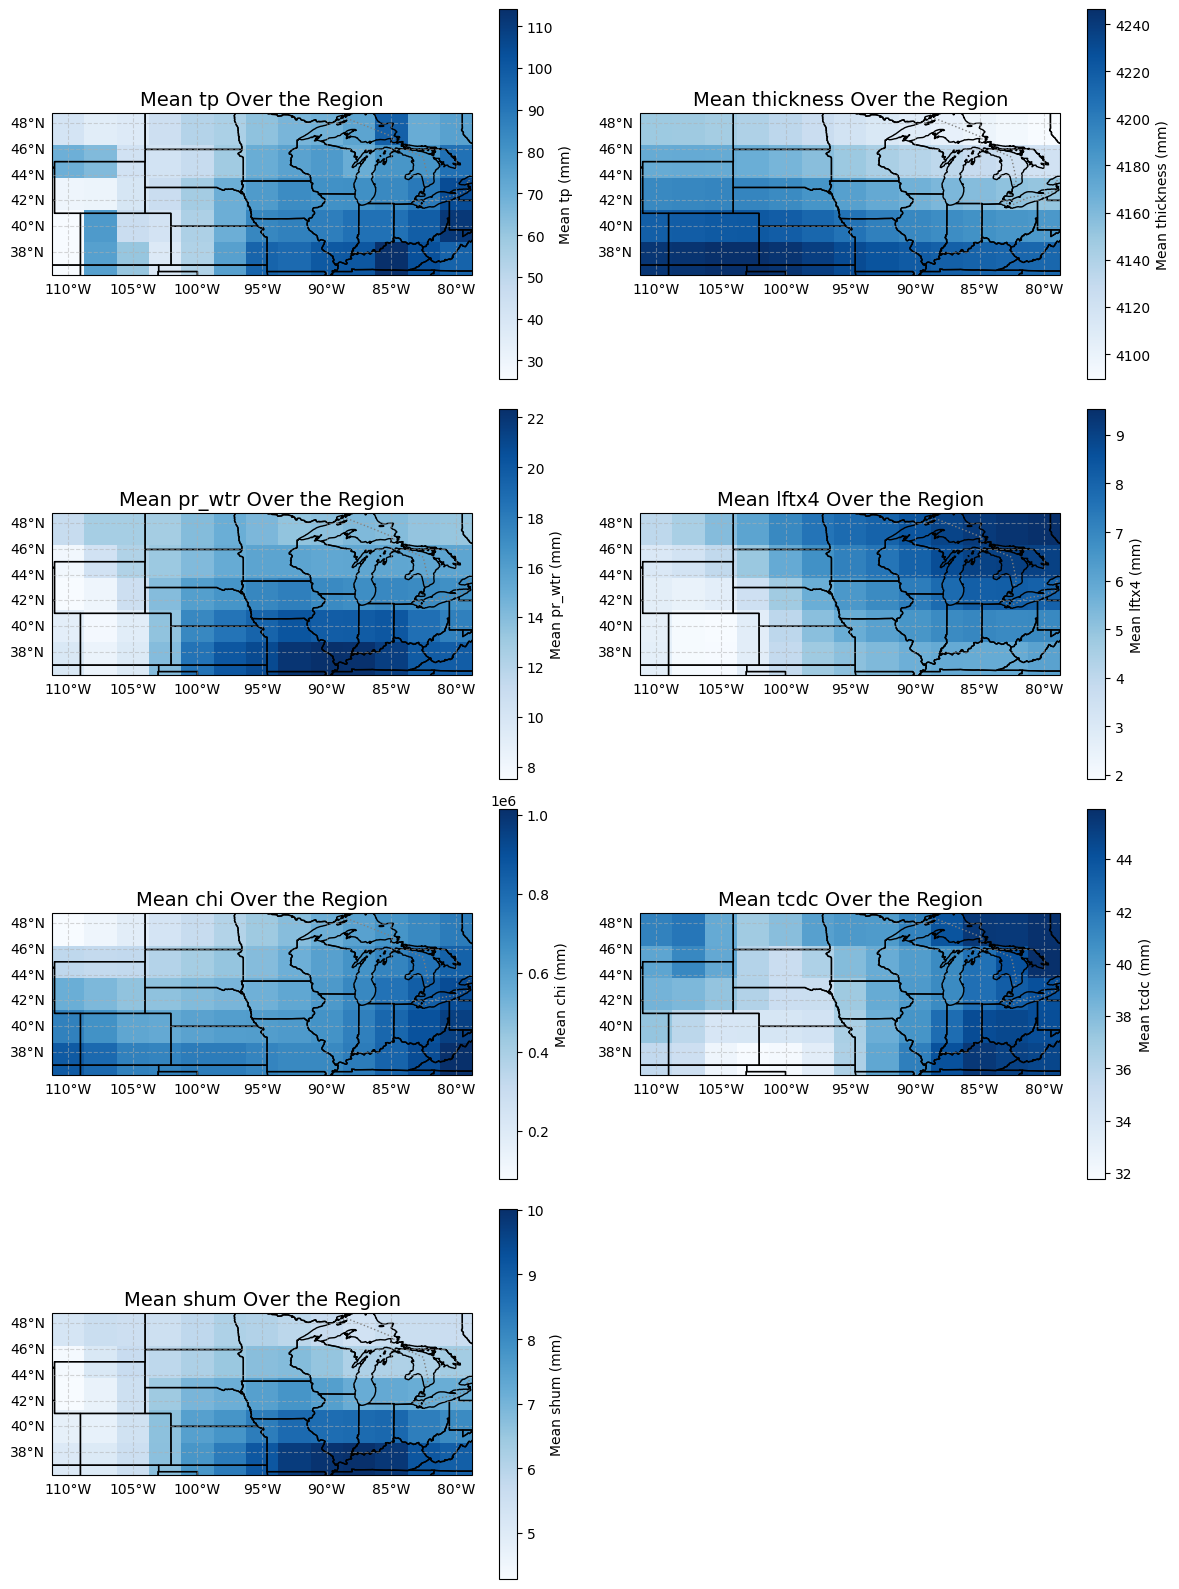

In [12]:
# Determine the number of variables
num_vars = len(combined.data_vars)

# Create a figure with subplots
fig, axes = plt.subplots(
    nrows=(num_vars + 1) // 2,
    ncols=2,
    figsize=(12, 4 * ((num_vars + 1) // 2)),
    subplot_kw={"projection": ccrs.PlateCarree()},
)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each variable and plot spatial mean
for i, var in enumerate(combined.data_vars):
    # Calculate 2D mean over the time dimension
    mean_var = combined[var].mean(dim="time")

    # Plot the 2D mean precipitation
    mean_var.plot(
        ax=axes[i],
        transform=ccrs.PlateCarree(),
        cmap="Blues",
        cbar_kwargs={"label": f"Mean {var} (mm)"},
    )

    # Add geographic features
    axes[i].add_feature(
        cfeature.BORDERS, linestyle=":", edgecolor="gray"
    )  # Country borders
    axes[i].add_feature(cfeature.STATES, edgecolor="black")  # State boundaries
    axes[i].coastlines()

    # Adding gridlines
    gl = axes[i].gridlines(draw_labels=True, linestyle="--", alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False

    # Title for each subplot
    axes[i].set_title(f"Mean {var} Over the Region", fontsize=14)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Max and min total precipitation

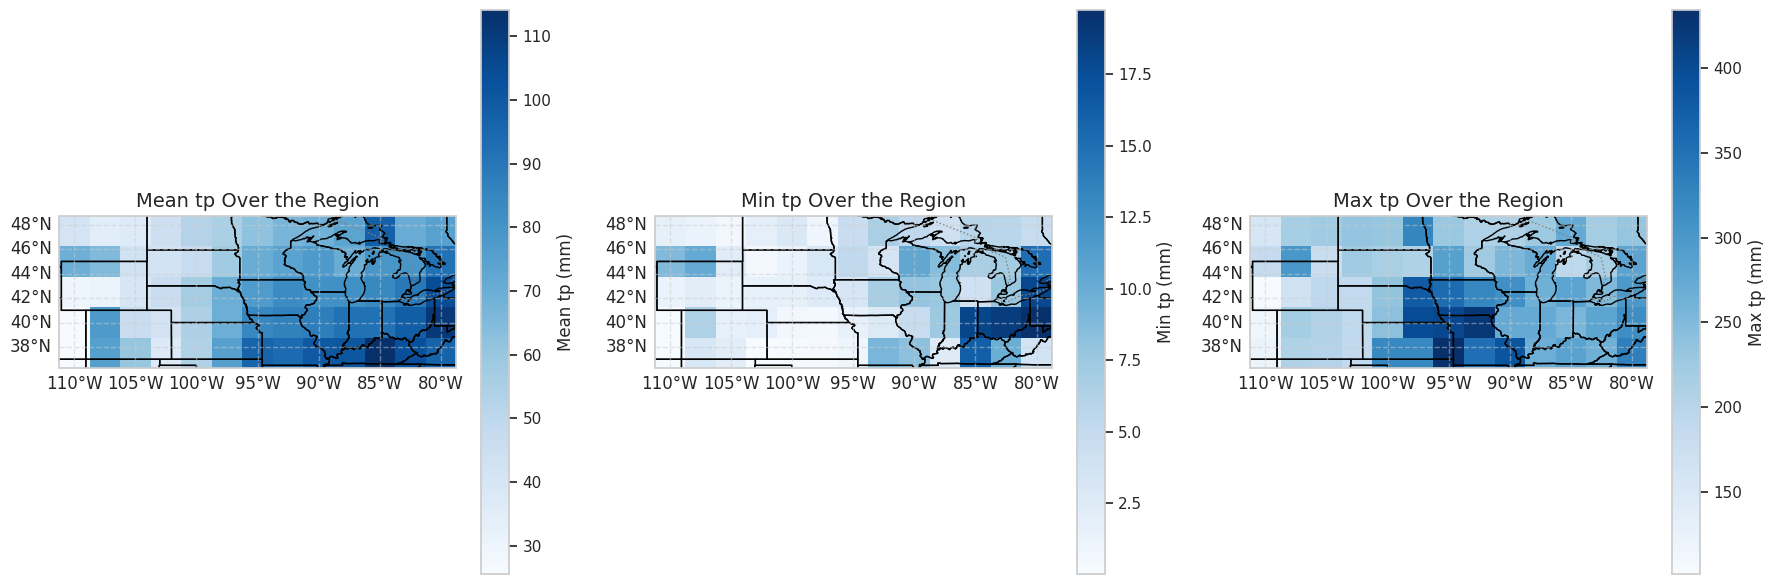

In [17]:
# Create a figure with three subplots
fig, axes = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(18, 6),
    subplot_kw={"projection": ccrs.PlateCarree()},
)

# List of statistics to plot
stats = ["mean", "min", "max"]

# Calculate the required statistics for the 'tp' variable
tp_mean = combined["tp"].mean(dim="time")
tp_min = combined["tp"].min(dim="time")
tp_max = combined["tp"].max(dim="time")

# Dictionary to map statistics to data
tp_stats = {"mean": tp_mean, "min": tp_min, "max": tp_max}

# Plot the statistics
for i, stat in enumerate(stats):
    # Get the corresponding data for each statistic
    data = tp_stats[stat]

    # Plot the data
    data.plot(
        ax=axes[i],
        transform=ccrs.PlateCarree(),
        cmap="Blues",
        cbar_kwargs={"label": f"{stat.capitalize()} tp (mm)"},
    )

    # Add geographic features
    axes[i].add_feature(cfeature.BORDERS, linestyle=":", edgecolor="gray")
    axes[i].add_feature(cfeature.STATES, edgecolor="black")
    axes[i].coastlines()

    # Adding gridlines
    gl = axes[i].gridlines(draw_labels=True, linestyle="--", alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False

    # Title for each subplot
    axes[i].set_title(f"{stat.capitalize()} tp Over the Region", fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Analyze Ocean Nino Index (ONI)

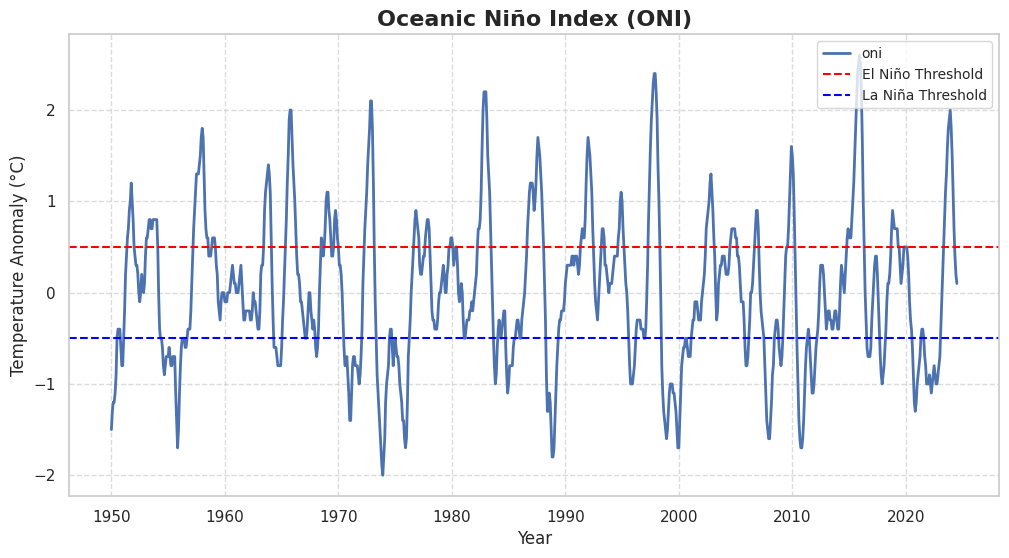

In [15]:
# Set seaborn style for aesthetics
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))

# Plotting the ONI using seaborn color palette
sns.lineplot(data=oni, color="royalblue", linewidth=2)

# Adding title and labels with seaborn's style
plt.title("Oceanic Niño Index (ONI)", fontsize=16, fontweight="bold")
plt.ylabel("Temperature Anomaly (°C)", fontsize=12)
plt.xlabel("Year", fontsize=12)

# Highlighting significant El Niño/La Niña thresholds
plt.axhline(0.5, color="red", linestyle="--", linewidth=1.5, label="El Niño Threshold")
plt.axhline(
    -0.5, color="blue", linestyle="--", linewidth=1.5, label="La Niña Threshold"
)

# Customize grid
plt.grid(True, linestyle="--", alpha=0.7)

# Display the legend
plt.legend(loc="upper right", fontsize=10)

# Show the plot
plt.show()

# Cross-Correlation Analysis

/tmp/ipykernel_3657/658952886.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lag_index, y=correlations, ax=ax, palette="viridis")
/tmp/ipykernel_3657/658952886.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lag_index, y=correlations, ax=ax, palette="viridis")
/tmp/ipykernel_3657/658952886.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lag_index, y=correlations, ax=ax, palette="viridis")
/tmp/ipykernel_3657/658952886.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in 

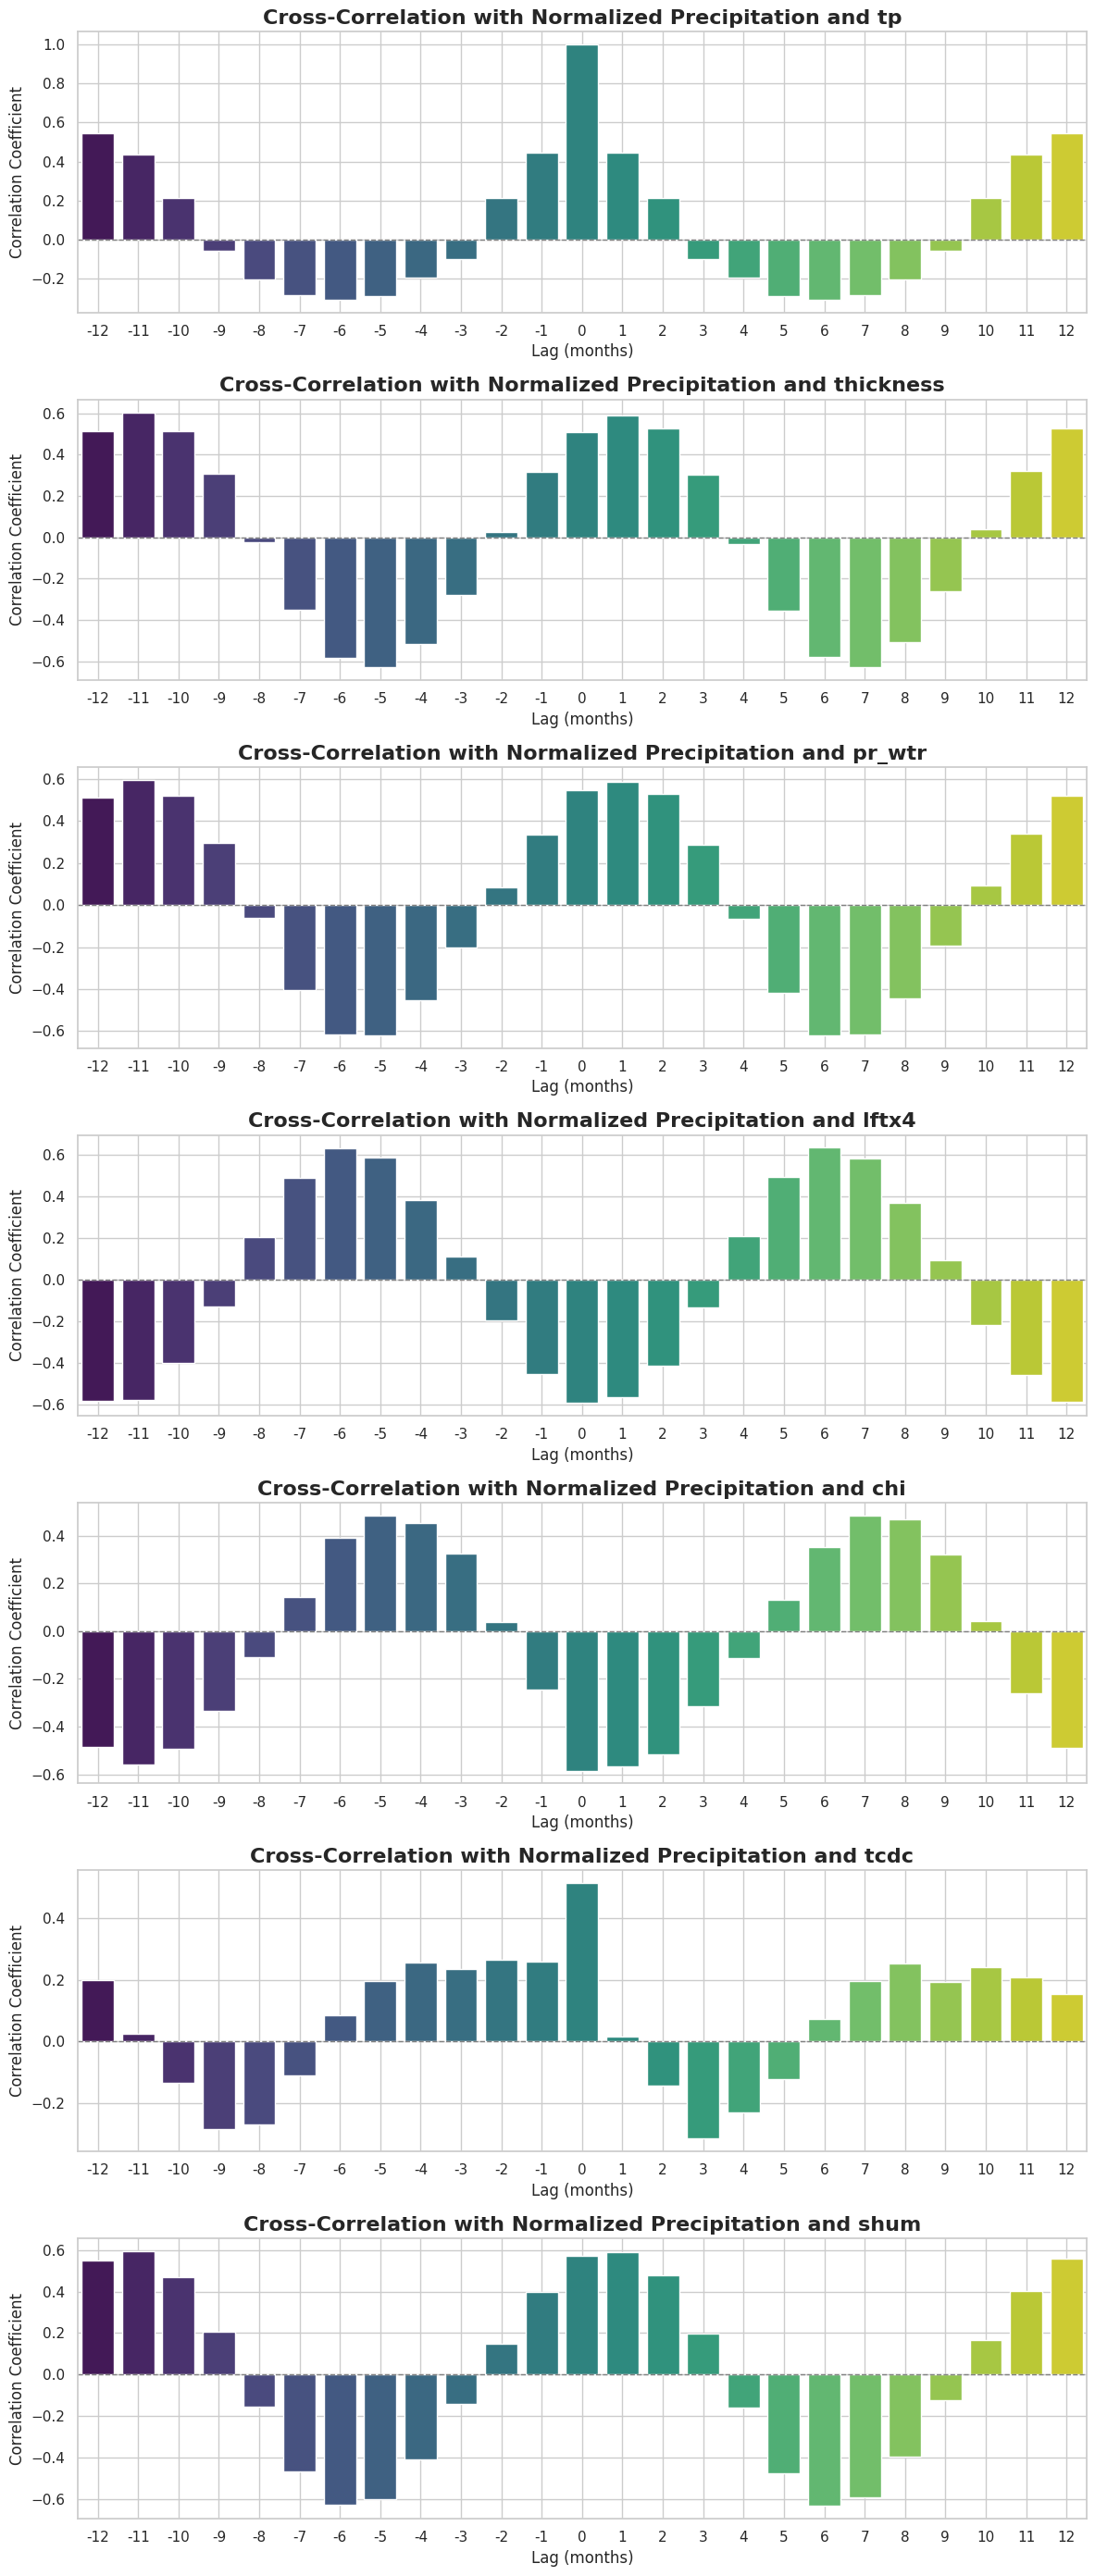

In [16]:
# Set seaborn style for aesthetics
sns.set(style="whitegrid")

# Step 1: Normalize total precipitation
precipitation = combined["tp"].sum(dim=["latitude", "longitude"])
precipitation_min = precipitation.min()
precipitation_max = precipitation.max()
precipitation_norm = (precipitation - precipitation_min) / (
    precipitation_max - precipitation_min
)

# Convert the normalized DataArray to a DataFrame
precipitation_df = precipitation_norm.to_dataframe(name="Normalized Precipitation")

# Reset the index to ensure time is a column before setting it as the index
precipitation_df.reset_index(inplace=True)
precipitation_df.set_index("time", inplace=True)

# Step 2: Prepare DataFrames for all variables
correlation_results = {}

# Define maximum lag in months
max_lag = 12

# Step 3: Compute cross-correlation for all variables
for var in combined.data_vars:
    # Sum the variable over the spatial dimensions
    summed_var = combined[var].sum(dim=["latitude", "longitude"])

    # Normalize the variable
    var_min = summed_var.min()
    var_max = summed_var.max()
    var_norm = (summed_var - var_min) / (var_max - var_min)

    # Convert normalized variable to DataFrame
    var_df = var_norm.to_dataframe(name="Normalized " + var)
    var_df.reset_index(inplace=True)
    var_df.set_index("time", inplace=True)

    # Merge the normalized variable with precipitation
    merged_df = precipitation_df.merge(var_df, left_index=True, right_index=True)

    # Compute cross-correlation for lags
    correlations = []
    for lag in range(-max_lag, max_lag + 1):
        if lag < 0:
            corr = merged_df["Normalized Precipitation"].corr(
                merged_df["Normalized " + var].shift(-lag)
            )
        else:
            corr = (
                merged_df["Normalized Precipitation"]
                .shift(lag)
                .corr(merged_df["Normalized " + var])
            )
        correlations.append(corr)

    # Store the results
    correlation_results[var] = correlations

# Step 4: Plot the cross-correlations for each variable
fig, axes = plt.subplots(
    nrows=len(correlation_results), ncols=1, figsize=(12, 4 * len(correlation_results))
)

for ax, (var, correlations) in zip(axes, correlation_results.items()):
    lag_index = np.arange(-max_lag, max_lag + 1)
    sns.barplot(x=lag_index, y=correlations, ax=ax, palette="viridis")
    ax.axhline(0, color="gray", linestyle="--", linewidth=1)
    ax.set_title(
        f"Cross-Correlation with Normalized Precipitation and {var}",
        fontsize=16,
        fontweight="bold",
    )
    ax.set_xlabel("Lag (months)", fontsize=12)
    ax.set_ylabel("Correlation Coefficient", fontsize=12)
    ax.grid(True)

plt.tight_layout()
plt.show()